In [1]:
import pandas as pd
import seaborn as sbr
import statistics as sn

In [6]:
#importar os dados
dataset = pd.read_csv("tempo.csv", sep = ";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [8]:
dataset.shape

(14, 5)

In [9]:
#procurar NaS
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [10]:
dataset["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [12]:
#pegar a mediana da umidade
mediana = sn.median(dataset["Umidade"])
mediana

85.5

In [13]:
#substituir NaS pelas medianas e verificar logo em seguida
dataset["Umidade"].fillna(mediana, inplace = True)
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [16]:
#padronizar o vento
agrupar = dataset.groupby(["Vento"]).size()
agrupar

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [17]:
#ver quantidade de NaS
dataset["Vento"].isnull().sum()

np.int64(1)

In [18]:
#preencher NaS com "Falso" pois é o que mais ocorre
dataset["Vento"].fillna("FALSO", inplace = True)
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

<Axes: xlabel='Vento'>

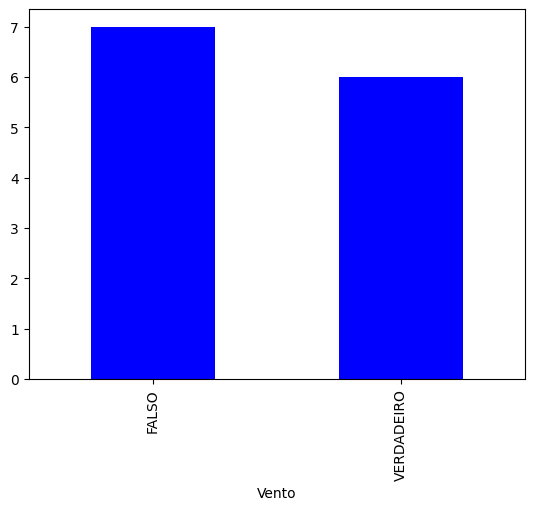

In [21]:
#exibição em gráficos
agrupar.plot.bar(color = "blue")

C:\Users\Intel\AppData\Local\Temp\ipykernel_19840\4138769072.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbr.distplot(dataset["Umidade"]).set_title("Umidade")


Text(0.5, 1.0, 'Umidade')

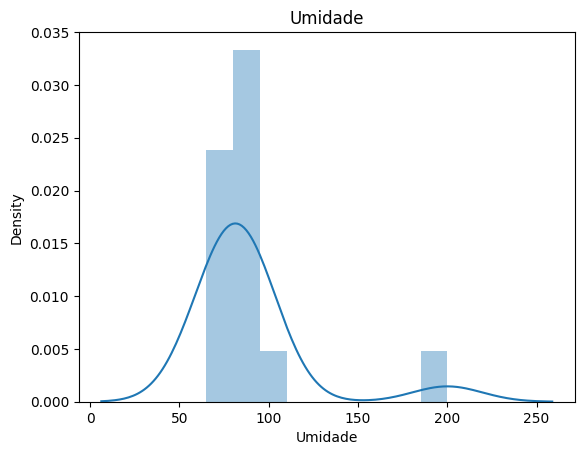

In [22]:
#como a umidade é em números, utilizar seaborn
sbr.distplot(dataset["Umidade"]).set_title("Umidade")